In [51]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from knn import KNN

In [52]:
male_data = pd.read_csv ( 'ANSUR_II_MALE_Public.csv', encoding = "latin-1")
female_data = pd.read_csv ( 'ANSUR_II_FEMALE_Public.csv', encoding = "latin-1")
data = pd.concat([male_data,female_data ])


In [53]:
#preprocess

In [54]:
data['weightkg'] = data['weightkg'] / 10
data['stature'] = data['stature'] / 10 
data['waistcircumference'] = data['waistcircumference'] /10 
data['chestcircumference'] = data['chestcircumference'] /10 
data['Gender'] = data['Gender'].replace(['Female','Male'], [0,1])


In [55]:
# print(male_data['chestcircumference'].mean())
# print(female_data['chestcircumference'].mean())

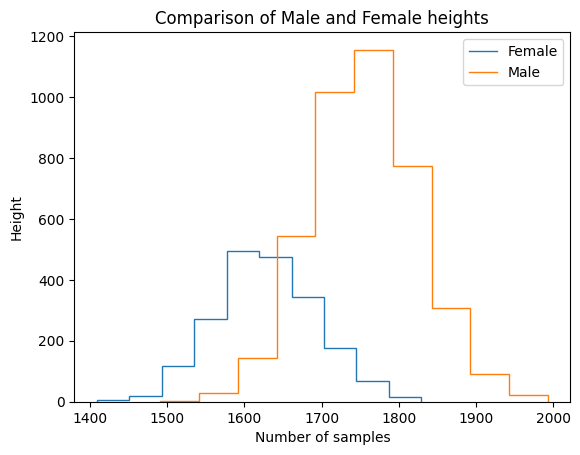

In [56]:

counts, bins = np.histogram(female_data['stature'])
plt.stairs(counts, bins, label = "Female")
counts_1, bins_1 = np.histogram(male_data['stature'])
plt.stairs(counts_1, bins_1, label = "Male")
plt.title('Comparison of Male and Female heights')
plt.xlabel('Number of samples')
plt.ylabel('Height')
plt.legend()
plt.show()

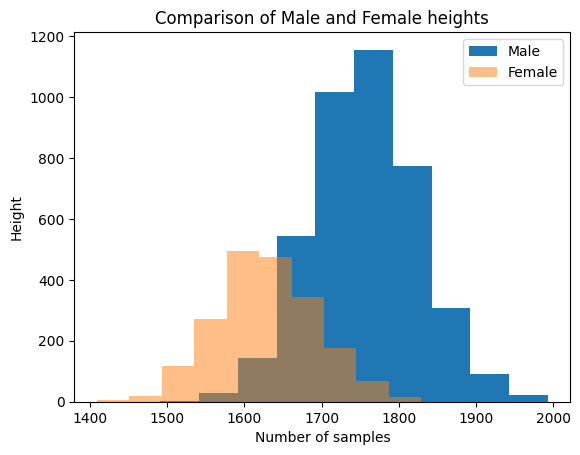

In [57]:
counts_1, bins_1 = np.histogram(male_data['stature'])
plt.hist(bins_1[:-1], bins_1, weights=counts_1, label = "Male")
counts, bins = np.histogram(female_data['stature'])
plt.hist(bins[:-1], bins, weights=counts, label = "Female", alpha = 0.5)

plt.title('Comparison of Male and Female heights')
plt.xlabel('Number of samples')
plt.ylabel('Height')
plt.legend()
plt.show()

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
def generate_dataset():
    weight = data['weightkg'].to_numpy()
    height = data['stature'].to_numpy()
    # wci = data['waistcircumference']
    # chest = data['chestcircumference']
    X = data[['weightkg','stature']].to_numpy()
    Y = data['Gender'].to_numpy()
    return X,Y


In [60]:
X,Y = generate_dataset()
X,Y

(array([[ 81.5, 177.6],
        [ 72.6, 170.2],
        [ 92.9, 173.5],
        ...,
        [ 76.2, 164.4],
        [ 63.2, 161.6],
        [ 61. , 164.1]]),
 array([1, 1, 1, ..., 0, 0, 0], dtype=int64))

In [61]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=4)
len(x_test)


1214

In [62]:
x_test, y_test

(array([[ 90. , 179. ],
        [ 88. , 177.7],
        [ 64.5, 163.7],
        ...,
        [ 91.3, 171.8],
        [ 95.1, 181.8],
        [ 70.2, 165.9]]),
 array([1, 1, 1, ..., 1, 1, 1], dtype=int64))

In [63]:
k = 3

In [66]:
knn = KNN(k=k)
knn.fit(x_train , y_train)
sample1 = np.array([65,165])
print(sample1)
# sample2 = np.array([90 , 156.1])
# sample3 = np.array([52.3  , 169 ])
# sample4 = np.array([80.4 , 190.5])
# sample5 = np.array([70 , 170 ])
samples = [sample1]
outputs = knn.predict(sample1)
print(outputs)
for output in outputs: 
    if output == 0 : 
        print('Female👩')
    else:
        print('Male👨')

[ 65 165]
[0, 1]
Female👩
Male👨


In [49]:
knn.evaluate(x_test , y_test)

0.8352553542009885

In [50]:
#Confusion Matrix

In [70]:
y_pred = knn.predict(x_test)
def cm(y_pred, y_test):
    confusion_matrix = np.zeros((2,2))
    for i in range (len(x_test)):
        if y_pred[i] == 0 and  y_test[i] == 0:
            confusion_matrix[0][0] += 1 
        if y_pred[i] == 0 and y_test[i] == 1 :
            confusion_matrix[0][1] += 1
        if y_pred[i] == 1 and y_test[i] == 0 :
            confusion_matrix[1][0] += 1 
        if y_pred[i] == 1 and y_test[i] == 1 :
            confusion_matrix[1][1] += 1
    return(confusion_matrix)
        
confusion_matrix = cm(y_pred, y_test)
confusion_matrix

array([[293., 103.],
       [ 97., 721.]])

In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = k )
knn.fit(x_train , y_train)
knn.score(x_test, y_test)

0.8352553542009885

In [72]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics 

In [73]:
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[293,  97],
       [103, 721]], dtype=int64)

In [74]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [75]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred) 

In [76]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True]) 

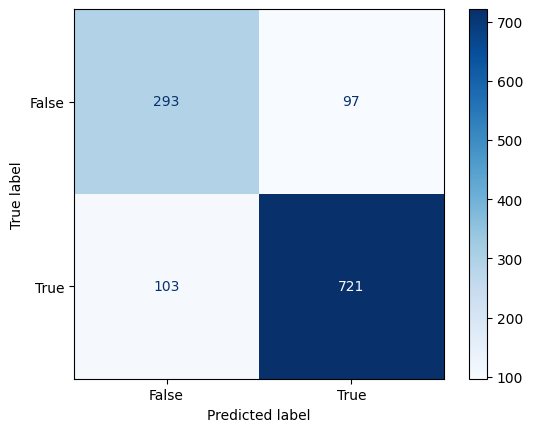

In [77]:
cm_display.plot(cmap=plt.cm.Blues)
plt.show() 